# Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px


## `Iris Dataset Overview`

The dataset consists of **150 samples** from **three species** of the Iris flower:
- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Each sample includes the following **four numerical features** (in centimeters):

1. *Sepal length*
2. *Sepal width*
3. *Petal length*
4. *Petal width*

**Dataset Summary**
- *Samples:* 150  
- *Features:* 4 (Sepal length, Sepal width, Petal length, Petal width)  
- *Classes:* 3 (Setosa, Versicolor, Virginica)


## Loading the Iris dataset

In [23]:
df = pd.read_csv("./datasets/Iris.csv", index_col='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Statistical Summary of the Data

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking Class Distribution

In [21]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Pair Plot Visualization

<Figure size 640x480 with 0 Axes>

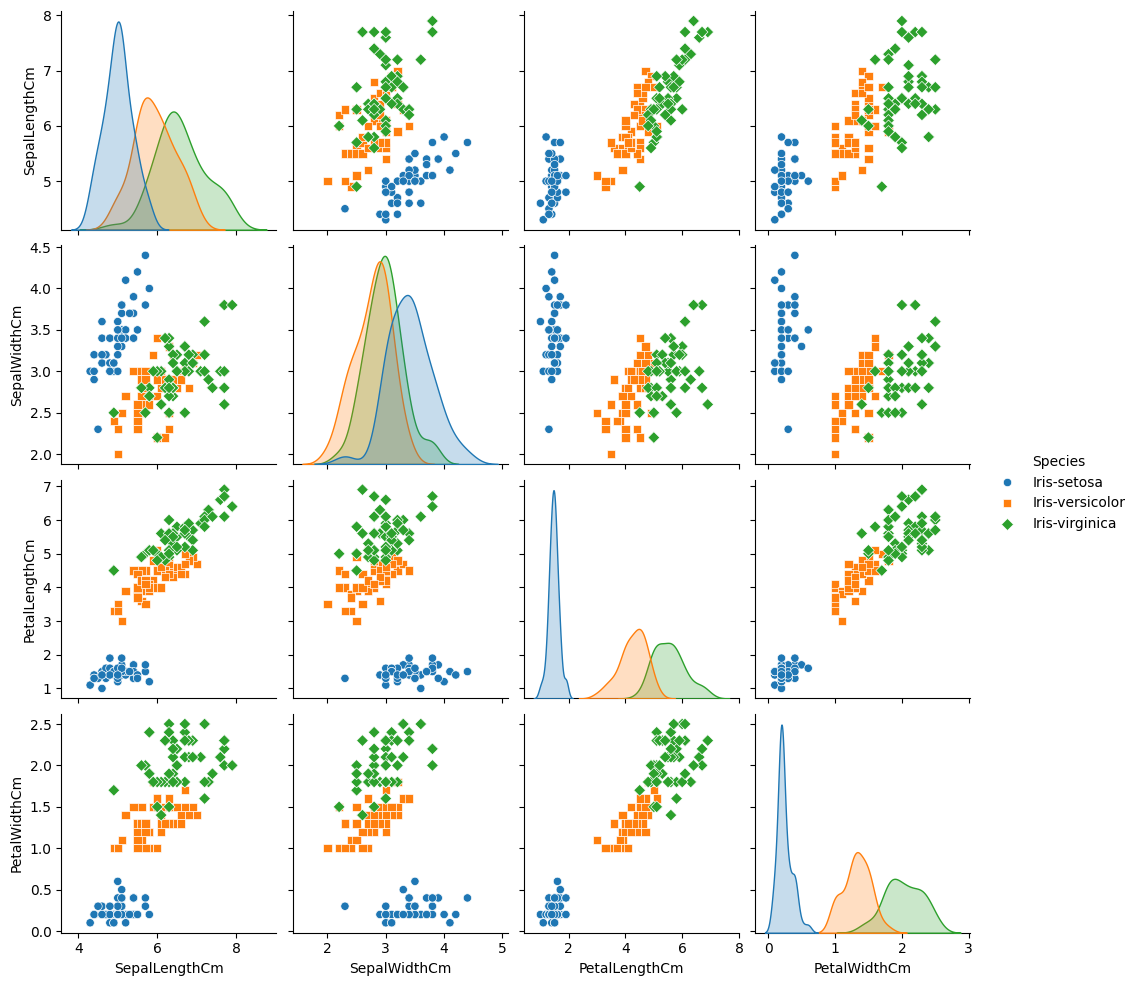

In [24]:
plt.figure()
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])
plt.show()

### Feature Selection for Visualization and Clustering

The features `PetalLengthCm` and `PetalWidthCm` were chosen because of their clear distribution across different iris species.

A scatterplot is used to visualize the relationship between these two features.

The same features are then used as input to KMeans clustering to evaluate how well an unsupervised algorithm can identify distinct clusters based on petal measurements alone.

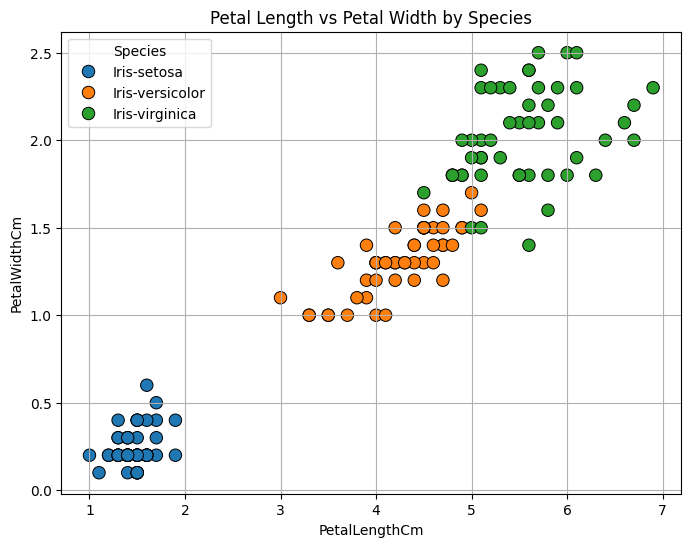

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', edgecolor='k', s=80)
plt.title('Petal Length vs Petal Width by Species')
plt.grid(True)
plt.show()

### KMeans Clustering

- **Feature selection**: The features `PetalLengthCm` and `PetalWidthCm` are selected as the input data for clustering.
- **KMeans initialization**: The KMeans algorithm is initialized with `n_clusters=3` and the `k-means++` method for better initialization of centroids.
- **Clustering**: The algorithm is trained on the selected features, and the cluster assignments are stored in the `Cluster` column of the dataset.
- **Cluster visualization**: A scatter plot is generated to visualize the clusters, with the cluster centers marked as black 'X' symbols.


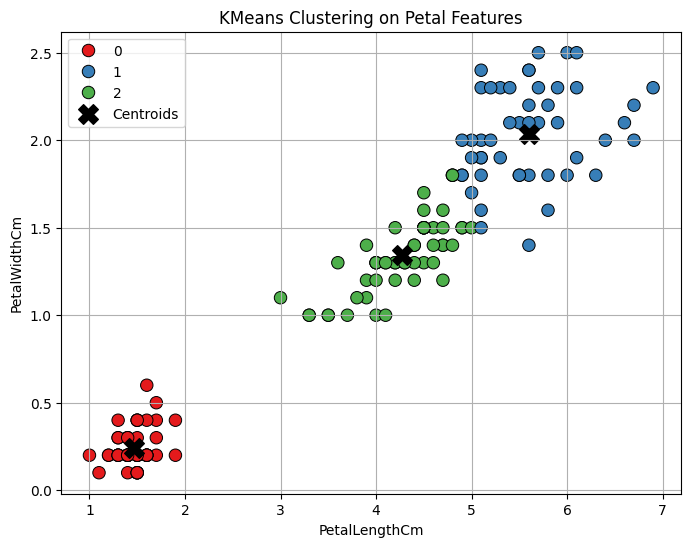

In [ ]:
# Feature selection
X = df[['PetalLengthCm', 'PetalWidthCm']]

# Initializing and training KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
df['Cluster'] = kmeans.fit_predict(X)

# Getting cluster centers
centroids = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', palette='Set1', edgecolor='k', s=80)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering on Petal Features')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.grid(True)
plt.show()

## Comparing Original Clusters and Predicted Clusters

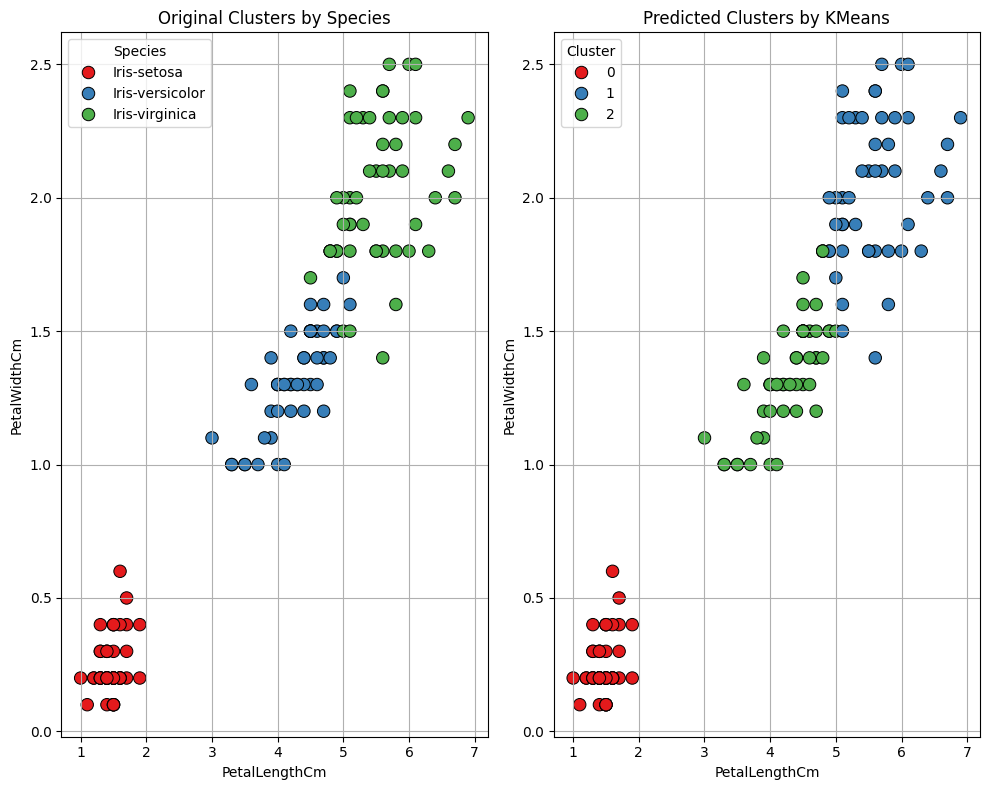

In [41]:
# Original classes (Species)
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1', edgecolor='k', s=80)
plt.title('Original Clusters by Species')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.grid(True)

# Predicted clusters (Cluster)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', palette='Set1', edgecolor='k', s=80)
plt.title('Predicted Clusters by KMeans')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.grid(True)

# Show
plt.tight_layout()
plt.show()

## Conclusion

- KMeans found the **Iris-setosa** group very well.
- `Iris-versicolor` and `Iris-virginica` are a bit similar, so KMeans sometimes mixed them up.
- In general, KMeans did a good job, even without knowing the real labels.
